In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
from nibabel.viewers import OrthoSlicer3D
from nibabel import nifti1
import nibabel as nib
from matplotlib import pylab as plt
import matplotlib
from ml_logic.data import load_nii_from_gcp

from google.cloud import storage



In [2]:
import os
# make a lockal cach folder
directory = "cache" 

#need to change the '/home/yaoyx001/code/' to your folder location
parent_dir = "/home/yaoyx001/code/" 
# Path
path = os.path.join(parent_dir, directory)
  
# Create the directory
if not os.path.exists(path):
    os.makedirs(path)
    print("Directory '% s' created" % directory)



In [3]:
from google.cloud import storage
import os

#check the connection to GCP
client = storage.Client()

#get the Bucket Name from .env
bucket_name = 'row_data_bucket'
bucket = client.get_bucket(bucket_name)

blob_name='BraTS20_Training_001_seg.nii'
#get the blob(file)
blob = bucket.blob(blob_name)

cache_file = os.path.join(path, blob_name)
#save the file in cache_folder

if not os.path.isfile(cache_file):
    blob.download_to_filename(cache_file)

In [12]:
from google.cloud import storage
import os


client = storage.Client()

#get the Bucket Name from .env
bucket_name = 'row_data_bucket'
#set bucket
bucket = client.get_bucket(bucket_name)
#give the blob_name that you want to access
blob_name='BraTS20_Training_005_seg.nii'
#get the blob(file)
blob = bucket.blob(blob_name)
# make a lockal cach folder
directory = "cache" 
parent_dir = "/home/yaoyx001/code/" #need to change the yaoyx001 to your username
# Path
path = os.path.join(parent_dir, directory)
  
# Create the directory
if not os.path.exists(path):
    os.makedirs(path)
    print("Directory '% s' created" % directory)

cache_file = os.path.join(path, blob_name)
#save the file in cache_folder

if not os.path.isfile(cache_file):
    blob.download_to_filename(cache_file)

In [21]:
def load_nii_from_gcp2(filename:str,cache_folder_path:path):
    from google.cloud import storage
    import os
    import nibabel as nib
    
    
    #make the connection to GCP
    client = storage.Client()
    #get the Bucket Name from .env
    bucket_name = 'row_data_bucket'
    #set bucket
    bucket = client.get_bucket(bucket_name)
    #give the blob_name that you want to access
    blob_name= filename
    #get the blob(file)
    blob = bucket.blob(blob_name)
    
    cache_file_path = os.path.join(cache_folder_path, blob_name)
    #save the file in cache_folder
    if not os.path.isfile(cache_file_path):
        blob.download_to_filename(cache_file_path)
        
    img =nib.load(cache_file_path)
    return img


<class 'nibabel.nifti1.Nifti1Image'>
data shape (240, 240, 155)
affine:
[[ -1.  -0.  -0.   0.]
 [ -0.  -1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b    

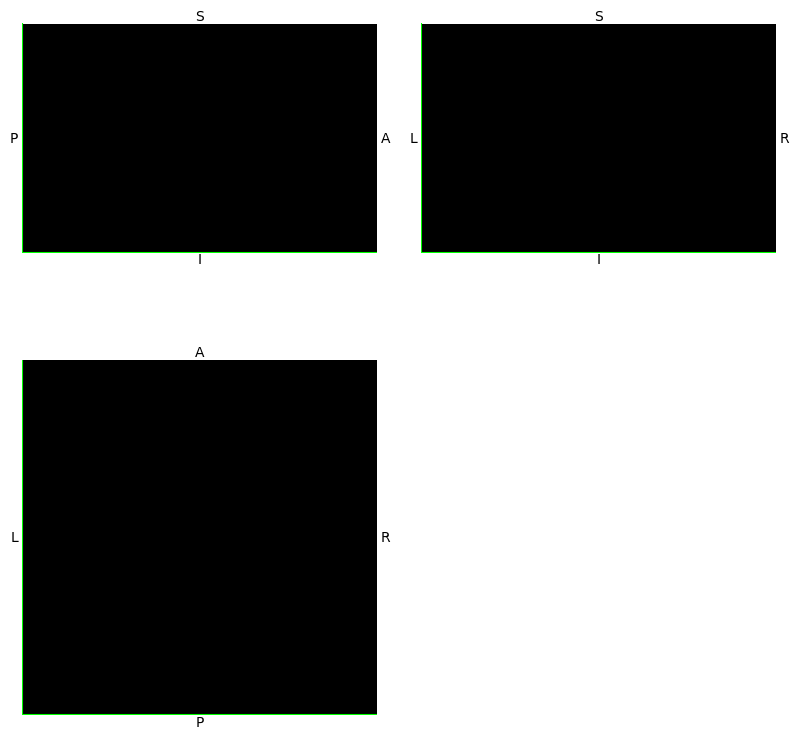

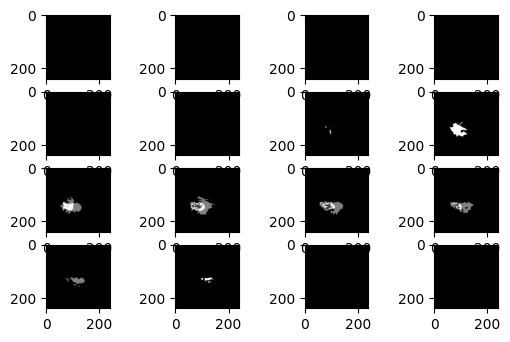

In [6]:
#load the 
img = load_nii_from_gcp('BraTS20_Training_006_seg.nii',"/home/yaoyx001/code/cache")

# print the img
print(img)
print(img.dataobj.shape)


# 由文件本身维度确定，可能是3维，也可能是4维 
width,height,queue=img.dataobj.shape
 
OrthoSlicer3D(img.dataobj).show()
 
num = 1
for i in range(0,queue,10):
 
    img_arr = img.dataobj[:,:,i]
    plt.subplot(5,4,num)
    plt.imshow(img_arr,cmap='gray')
    num +=1
 
plt.show()


In [4]:
def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    # The ID of your GCS bucket
    # bucket_name = "your-bucket-name"
    # The path to your file to upload
    # source_file_name = "local/path/to/file"
    # The ID of your GCS object
    # destination_blob_name = "storage-object-name"

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    # Optional: set a generation-match precondition to avoid potential race conditions
    # and data corruptions. The request to upload is aborted if the object's
    # generation number does not match your precondition. For a destination
    # object that does not yet exist, set the if_generation_match precondition to 0.
    # If the destination object already exists in your bucket, set instead a
    # generation-match precondition using its generation number.
    generation_match_precondition = 0

    blob.upload_from_filename(source_file_name, if_generation_match=generation_match_precondition)

    print(
        f"File {source_file_name} uploaded to {destination_blob_name}."
    )


In [7]:
upload_blob(bucket_name='row_data_bucket', source_file_name="Grade_ID_nii.pkl",destination_blob_name="Grade_ID_nii.pkl")

File Grade_ID_nii.pkl uploaded to Grade_ID_nii.pkl.


In [4]:
import os
import pandas as pd
channel = 't1'
#load nii file from cloud or local cach folder and save it as pkl in /raw_data

pkl_file= f"raw_data/Grade_ID_{channel}_nii.pkl"
print('loading nii from cloud as save it in raw_data folder')
if not os.path.isfile(pkl_file):
    
    print(f'{pkl_file} is saved into raw_data')

df = pd.read_pickle(pkl_file)

loading nii from cloud as save it in raw_data folder


EOFError: Ran out of input